Trabalho Final - Introdução ao Aprendizado de Máquina

Gustavo Mariz, Andrew Faria e Matheus Percine

# Importando Database

In [ ]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from google.colab import files
import sklearn

In [ ]:
#Importando a Database
df = pd.read_csv("/content/baseprocessada.csv",sep=",", encoding='cp1252')

#Printando para avaliar a importação
df.head()


,bathrooms,bedrooms,has_photo,price,square_feet,cityname,state,latitude,longitude,time,...,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors,dogs,cats
0,1.0,1.0,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,1577360355,...,0,0,0,0,0,0,0,0,0,1
1,1.5,3.0,1,1250.0,1500,Newport News,VA,37.0867,-76.4941,1577360340,...,0,0,0,0,0,0,0,0,1,1
2,2.0,3.0,1,1395.0,1650,Raleigh,NC,35.8230,-78.6438,1577360332,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2.0,1,1600.0,820,Vacaville,CA,38.3622,-121.9712,1577360330,...,0,0,0,0,0,0,0,0,1,1
4,1.0,1.0,1,975.0,624,Albuquerque,NM,35.1038,-106.6110,1577360308,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
# copiando Database para possíveis modificações
df_copy = df.copy()

# Experimentos Utilizando todo database

## Correlações

In [ ]:
# Remove colunas não numéricas
df = df.select_dtypes(include=np.number)

In [ ]:
# Normalizar dados (caso desejado)

# from sklearn.preprocessing import StandardScaler

# # Crie um objeto StandardScaler
# scaler = StandardScaler()

# # Ajuste o scaler aos seus dados e transforme-os
# df_scaled = scaler.fit_transform(df)

# # Converta o array numpy resultante de volta para um DataFrame pandas (opcional)
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# # Agora df_scaled contém seus dados normalizados
# print(df_scaled.head())

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Mostrar a matriz de correlação
print(correlation_matrix)

# Encontrar as correlações mais fortes
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.5]

# Mostrar as correlações mais fortes
print("\nCorrelações mais fortes (acima de 0.5):")
print(strong_correlations)


                    bathrooms  bedrooms  has_photo     price  square_feet  \
bathrooms            1.000000  0.671564   0.009605  0.288331     0.703893   
bedrooms             0.671564  1.000000   0.004591  0.211173     0.704261   
has_photo            0.009605  0.004591   1.000000  0.020160     0.012234   
price                0.288331  0.211173   0.020160  1.000000     0.332705   
square_feet          0.703893  0.704261   0.012234  0.332705     1.000000   
latitude            -0.088299  0.016283  -0.014157  0.111305    -0.029752   
longitude            0.001684  0.048836   0.036829 -0.088222     0.089992   
time                -0.054960 -0.003207  -0.135117  0.050553    -0.024643   
AC                  -0.018540  0.003519   0.046627 -0.050237    -0.035625   
Alarm                0.014830  0.002088   0.014021  0.001902     0.013275   
Basketball          -0.001691  0.001873   0.017948 -0.036567    -0.011874   
Cable or Satellite  -0.031829 -0.026677  -0.008162 -0.067823    -0.058307   

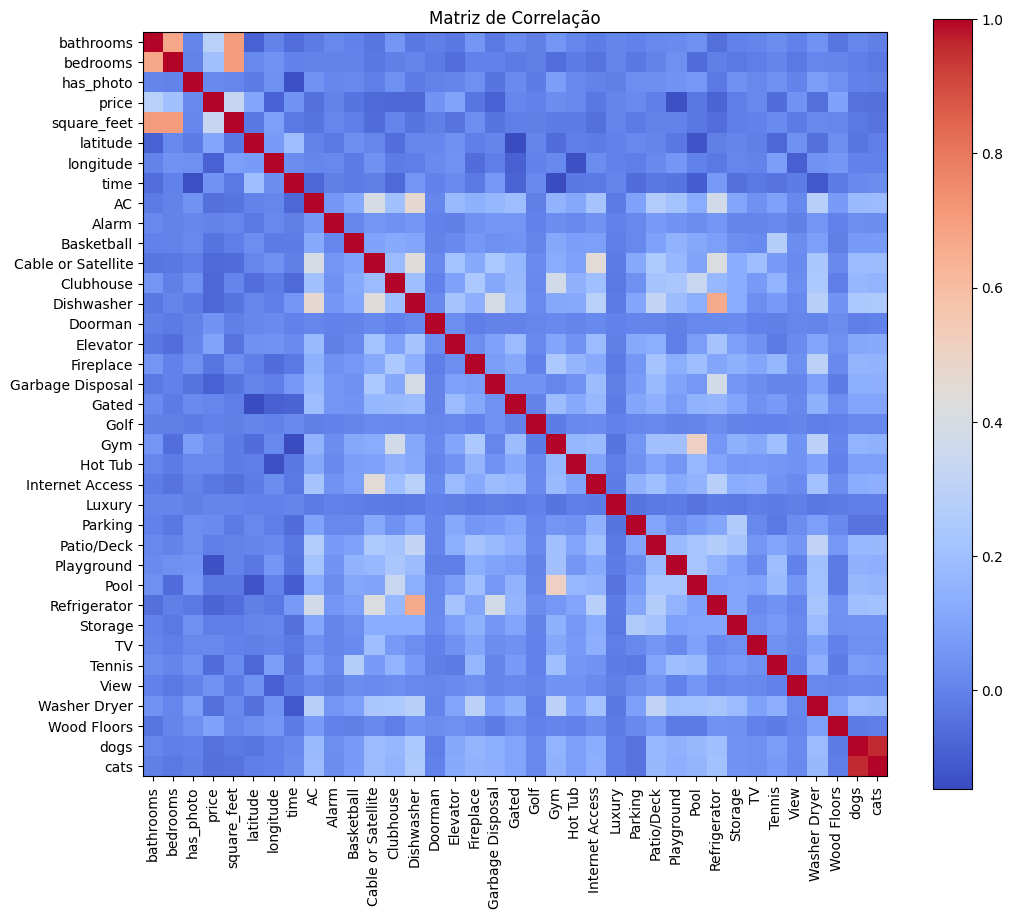

In [ ]:
# Plotar um mapa de calor para visualizar a correlação
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Matriz de Correlação')
plt.savefig('corr_matrix_all_inst.png')
plt.show()

## Construção de modelos (Regressão Linear)

### Utilizando todos atributos

In [ ]:
# Utilizando K-fold para divisão de grupos de treinamento e teste

# K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Número de folds
k = 5

# Criar um objeto KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Listas para armazenar os resultados de cada fold
mse_scores = []
r2_scores = []

# Separar os dados em features (X) e target (y)
X = df.drop('price', axis=1)  # Remove a coluna 'price' para usar como features
y = df['price']

i = 0
models = {}
predXreal = {}

# Iterar pelos folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Criar e treinar o modelo de regressão linear para este fold
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Armazenar o modelo treinado para este fold
    models[f'modelo{i}'] = model

    # Fazer previsões com os dados de teste do fold
    y_pred = model.predict(X_test)

    # Avaliar o modelo para este fold
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    predXreal[f'modelo{i}'] = {'y_test': y_test, 'y_pred': y_pred}
    i += 1

    mse_scores.append(mse)
    r2_scores.append(r2)

# Imprimir os resultados médios de todos os folds
print("Mean Squared Error (Média):", np.mean(mse_scores))
print("R-squared (Média):", np.mean(r2_scores))

Mean Squared Error (Média): 326911.6318891787
R-squared (Média): 0.21569577005176382


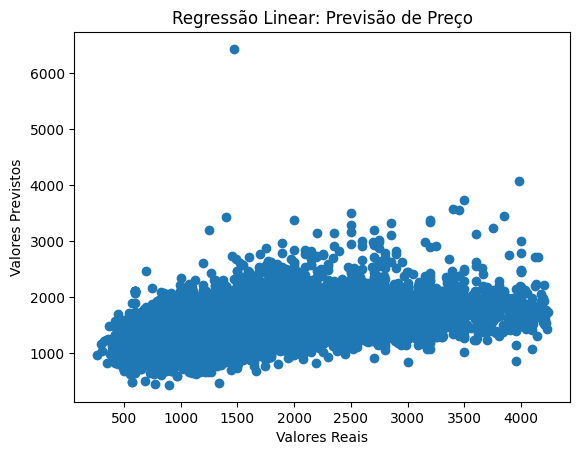

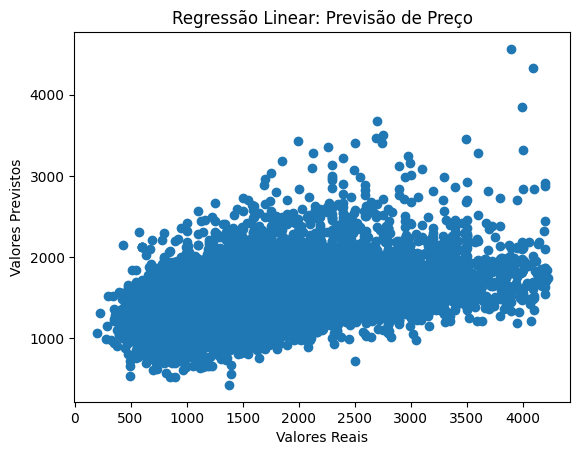

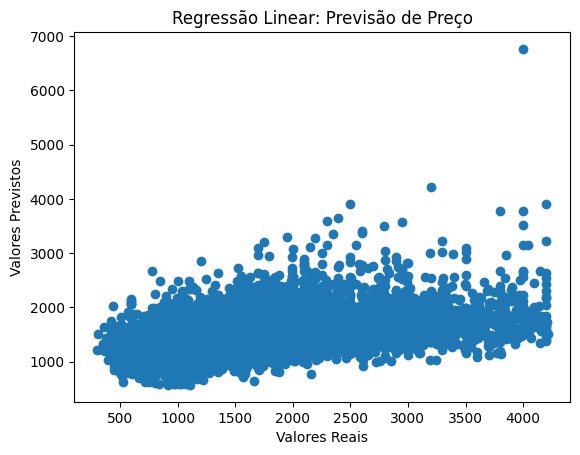

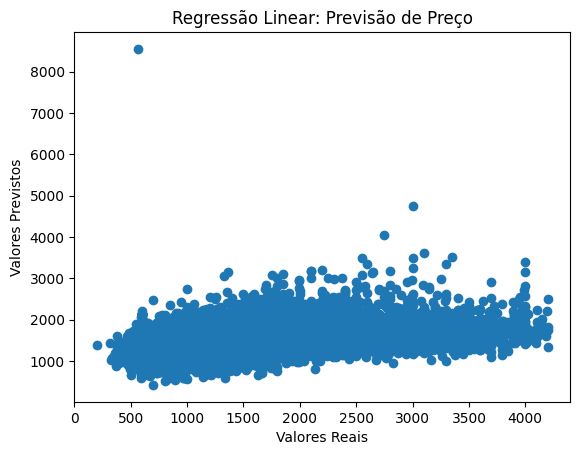

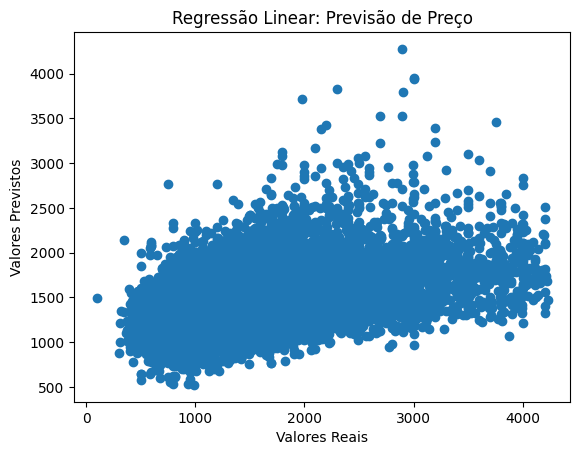

In [ ]:
# Plotar modelos


for m in models:
    y_test = predXreal[m]['y_test']
    y_pred = predXreal[m]['y_pred']

    # Plotar os resultados
    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Previstos")
    plt.title("Regressão Linear: Previsão de Preço")
    plt.savefig(f'{m}_all_inst.png')
    plt.show()

### Utilizando SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import f_regression

# # Separar os dados em features (X) e target (y)
# X = df.drop('price', axis=1)  # Remove a coluna 'price' para usar como features
# y = df['price']

selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features = selector.get_feature_names_out()
X_selected = X[selected_features]
#print(selected_features)

Melhor valor de k (menor MSE): 35
Melhor valor de k (maior R2): 35


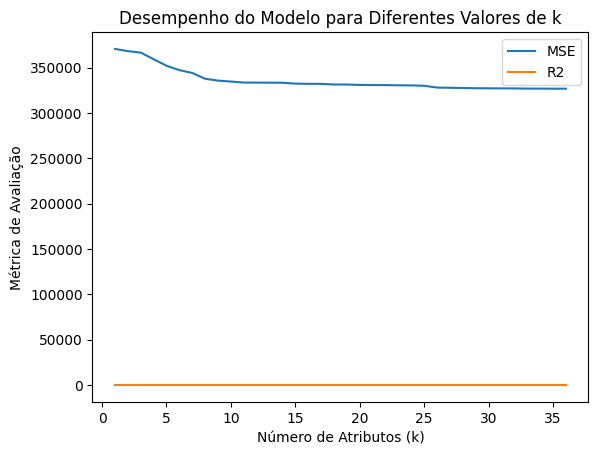

In [ ]:
# Separar os dados em features (X) e target (y)
X = df.drop('price', axis=1)  # Remove a coluna 'price' para usar como features
y = df['price']

# Lista para armazenar os resultados de diferentes valores de k
mse_scores_k = []
r2_scores_k = []

# Testar diferentes valores de k (número de atributos)
for k in range(1, X.shape[1] + 1):  # Itera de 1 até o número total de atributos
    selector = SelectKBest(f_regression, k=k)
    X_new = selector.fit_transform(X, y)

    # Aplicar K-fold com o novo conjunto de atributos
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    r2_scores = []
    for train_index, test_index in kf.split(X_new):
        X_train, X_test = X_new[train_index], X_new[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)

    mse_scores_k.append(np.mean(mse_scores))
    r2_scores_k.append(np.mean(r2_scores))

# Encontrar o melhor valor de k com base no menor MSE ou maior R2
best_k_mse = np.argmin(mse_scores_k) + 1
best_k_r2 = np.argmax(r2_scores_k) + 1

print(f"Melhor valor de k (menor MSE): {best_k_mse}")
print(f"Melhor valor de k (maior R2): {best_k_r2}")

# Plotar os resultados para analisar a influência do número de atributos
plt.plot(range(1, X.shape[1] + 1), mse_scores_k, label='MSE')
plt.plot(range(1, X.shape[1] + 1), r2_scores_k, label='R2')
plt.xlabel('Número de Atributos (k)')
plt.ylabel('Métrica de Avaliação')
plt.legend()
plt.title('Desempenho do Modelo para Diferentes Valores de k')
plt.show()

In [ ]:
# treinando o modelo usando as X_selected features

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Número de folds
k = 5

# Criar um objeto KFold
kf2 = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Listas para armazenar os resultados de cada fold
mse_scores = []
r2_scores = []

# Separar os dados em features (X) e target (y)
y = df['price']

i = 0
models_s = {}
predXreal_s = {}

# Iterar pelos folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Criar e treinar o modelo de regressão linear para este fold
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Armazenar o modelo treinado para este fold
    models_s[f'modelo{i}'] = model

    # Fazer previsões com os dados de teste do fold
    y_pred = model.predict(X_test)

    # Avaliar o modelo para este fold
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    predXreal_s[f'modelo{i}'] = {'y_test': y_test, 'y_pred': y_pred}
    i += 1

    mse_scores.append(mse)
    r2_scores.append(r2)

# Imprimir os resultados médios de todos os folds
print("Mean Squared Error (Média):", np.mean(mse_scores))
print("R-squared (Média):", np.mean(r2_scores))

Mean Squared Error (Média): 334766.29455238907
R-squared (Média): 0.19686933179259114


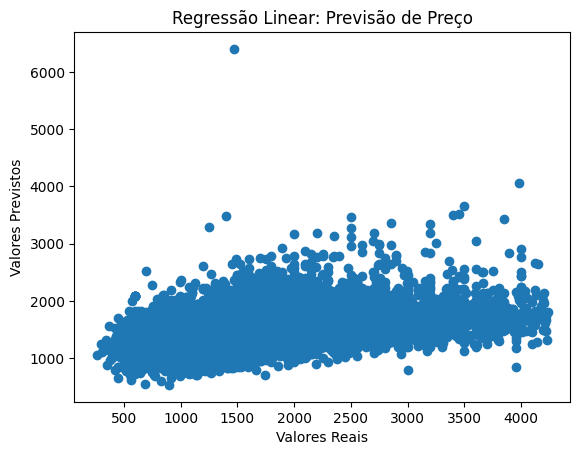

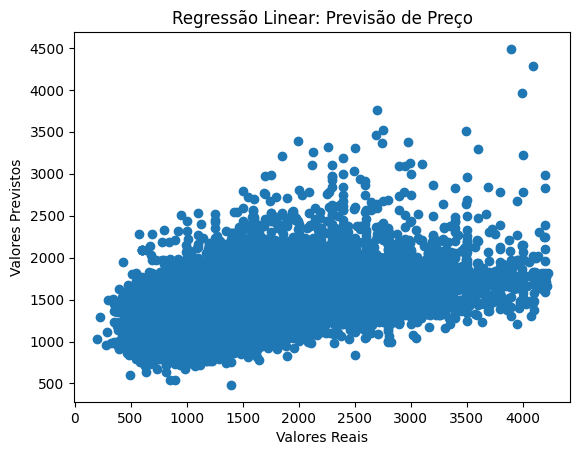

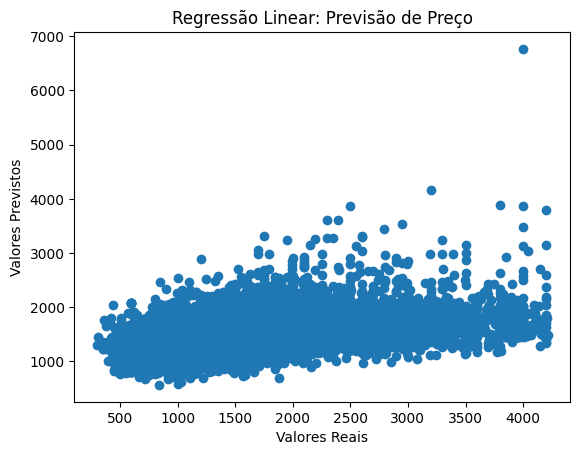

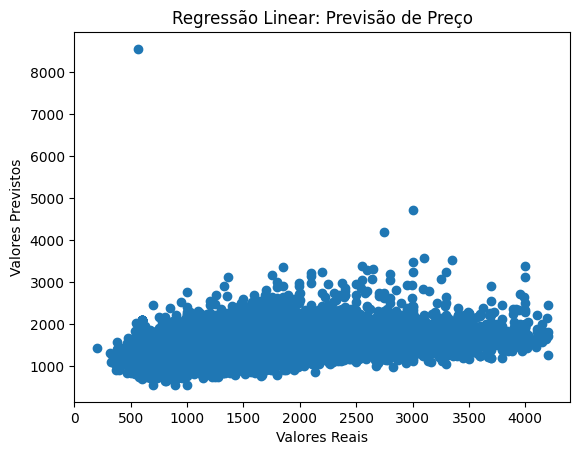

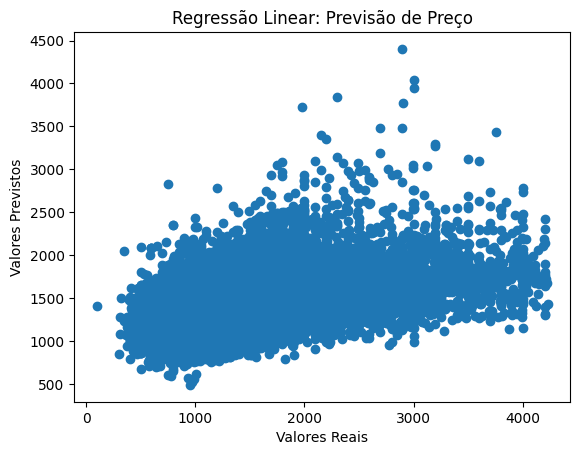

In [ ]:
for m in models_s:
    y_test = predXreal_s[m]['y_test']
    y_pred = predXreal_s[m]['y_pred']

    # Plotar os resultados
    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Previstos")
    plt.title("Regressão Linear: Previsão de Preço")
    plt.savefig(f'{m}_all_inst_k_best.png')
    plt.show()

Melhor valor de k (menor MSE): 35
Melhor valor de k (maior R2): 35


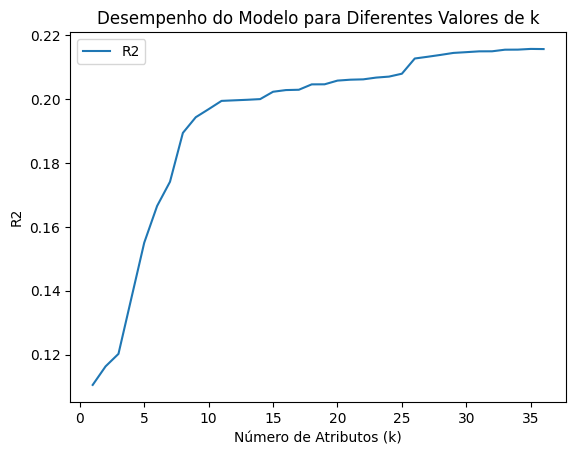

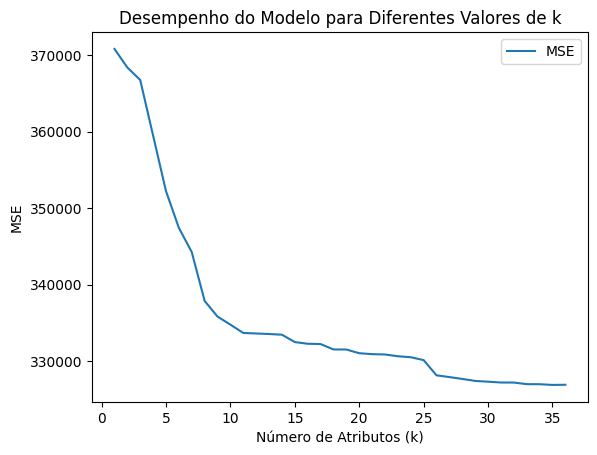

In [ ]:
# Separar os dados em features (X) e target (y)
X = df.drop('price', axis=1)  # Remove a coluna 'price' para usar como features
y = df['price']

# Lista para armazenar os resultados de diferentes valores de k
mse_scores_k = []
r2_scores_k = []

# Testar diferentes valores de k (número de atributos)
for k in range(1, X.shape[1] + 1):  # Itera de 1 até o número total de atributos
    selector = SelectKBest(f_regression, k=k)
    X_new = selector.fit_transform(X, y)

    # Aplicar K-fold com o novo conjunto de atributos
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    r2_scores = []
    for train_index, test_index in kf.split(X_new):
        X_train, X_test = X_new[train_index], X_new[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)

    mse_scores_k.append(np.mean(mse_scores))
    r2_scores_k.append(np.mean(r2_scores))

# Encontrar o melhor valor de k com base no menor MSE ou maior R2
best_k_mse = np.argmin(mse_scores_k) + 1
best_k_r2 = np.argmax(r2_scores_k) + 1

print(f"Melhor valor de k (menor MSE): {best_k_mse}")
print(f"Melhor valor de k (maior R2): {best_k_r2}")

# Plotar os resultados para analisar a influência do número de atributos
plt.plot(range(1, X.shape[1] + 1), r2_scores_k, label='R2')
plt.xlabel('Número de Atributos (k)')
plt.ylabel('R2')
plt.legend()
plt.title('Desempenho do Modelo para Diferentes Valores de k')
plt.savefig('r2_per_k_features.png')
plt.show()

plt.plot(range(1, X.shape[1] + 1), mse_scores_k, label='MSE')
plt.xlabel('Número de Atributos (k)')
plt.ylabel('MSE')
plt.legend()
plt.title('Desempenho do Modelo para Diferentes Valores de k')
plt.savefig('mse_per_k_features.png')
plt.show()

In [ ]:
r2_scores_k

[0.11047387769996084,
 0.11628687035607391,
 0.12020410049337986,
 0.13762518787976669,
 0.15503204262745518,
 0.166540741373919,
 0.17412796801336478,
 0.18943208901620603,
 0.19434225666074412,
 0.19686933179259108,
 0.19946234488520548,
 0.19963753158909386,
 0.19980887607593617,
 0.20001978134782045,
 0.2023242046640188,
 0.20284980761929922,
 0.20295001228204912,
 0.20463692858356763,
 0.20465526630280167,
 0.20581607236631397,
 0.20610162055640463,
 0.20620742861612876,
 0.20676064016747714,
 0.20706825385482608,
 0.2079756068406327,
 0.21274095126655368,
 0.2132866462875012,
 0.21386537508727468,
 0.21449160483928154,
 0.21473026361098838,
 0.2149832481896798,
 0.2149982076858205,
 0.2155002343148472,
 0.2155221206246667,
 0.21574243572766777,
 0.21569577005176388]

# Experimentos Utilizando instâncias do Texas

## Correlações

In [ ]:
#Importando a Database
df = pd.read_csv("/content/baseprocessada.csv",sep=",", encoding='cp1252')

#Printando para avaliar a importação
df.head()

# copiando Database para possíveis modificações
df_copy = df.copy()

In [ ]:
df_ca = df[df_copy['state'] == 'TX']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_ca['cityname'] = le.fit_transform(df_ca['cityname'])

df_ca = df_ca.drop('state', axis = 1)

df_ca.head()

<ipython-input-37-dfbd4ddf47a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['cityname'] = le.fit_transform(df_ca['cityname'])


,bathrooms,bedrooms,has_photo,price,square_feet,cityname,latitude,longitude,time,AC,...,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors,dogs,cats
15,1.0,1.0,1,729.0,800,165,29.4624,-98.5253,1577360099,0,...,0,0,0,0,0,0,0,0,1,1
20,1.0,1.0,1,1060.0,650,9,30.3054,-97.7497,1577359827,0,...,1,0,1,0,0,0,0,1,0,0
21,1.0,1.0,1,1003.0,797,160,30.5118,-97.6873,1577359796,0,...,1,0,0,0,0,0,0,0,0,0
22,1.0,1.0,1,837.0,444,9,30.3054,-97.7497,1577359784,0,...,1,0,0,0,0,0,0,0,0,0
23,1.0,1.0,1,1020.0,692,9,30.3054,-97.7497,1577359778,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Remove colunas não numéricas
df_ca = df_ca.select_dtypes(include=np.number)

In [ ]:
# Normalizar (caso desejado)

# from sklearn.preprocessing import StandardScaler

# # Crie um objeto StandardScaler
# scaler = StandardScaler()

# # Ajuste o scaler aos seus dados e transforme-os
# df_scaled = scaler.fit_transform(df)

# # Converta o array numpy resultante de volta para um DataFrame pandas (opcional)
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# # Agora df_scaled contém seus dados normalizados
# print(df_scaled.head())

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df_ca.corr()

# Mostrar a matriz de correlação
print(correlation_matrix)

# Encontrar as correlações mais fortes
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.5]

# Mostrar as correlações mais fortes
print("\nCorrelações mais fortes (acima de 0.5):")
print(strong_correlations)


                    bathrooms  bedrooms  has_photo     price  square_feet  \
bathrooms            1.000000  0.778055   0.047057  0.489936     0.749189   
bedrooms             0.778055  1.000000   0.035786  0.425557     0.765544   
has_photo            0.047057  0.035786   1.000000 -0.043801     0.036452   
price                0.489936  0.425557  -0.043801  1.000000     0.617130   
square_feet          0.749189  0.765544   0.036452  0.617130     1.000000   
cityname             0.073750  0.064919   0.043076 -0.064671     0.094282   
latitude             0.053560  0.014604  -0.189180  0.177812     0.054559   
longitude            0.012475 -0.006670   0.088288 -0.066490    -0.005702   
time                -0.103714 -0.061101  -0.248074  0.003990    -0.104186   
AC                  -0.000713  0.000400   0.055673 -0.157444    -0.054355   
Alarm                0.026344  0.022247  -0.019820  0.002160     0.009104   
Basketball           0.008086  0.007205   0.013817 -0.064868    -0.005609   

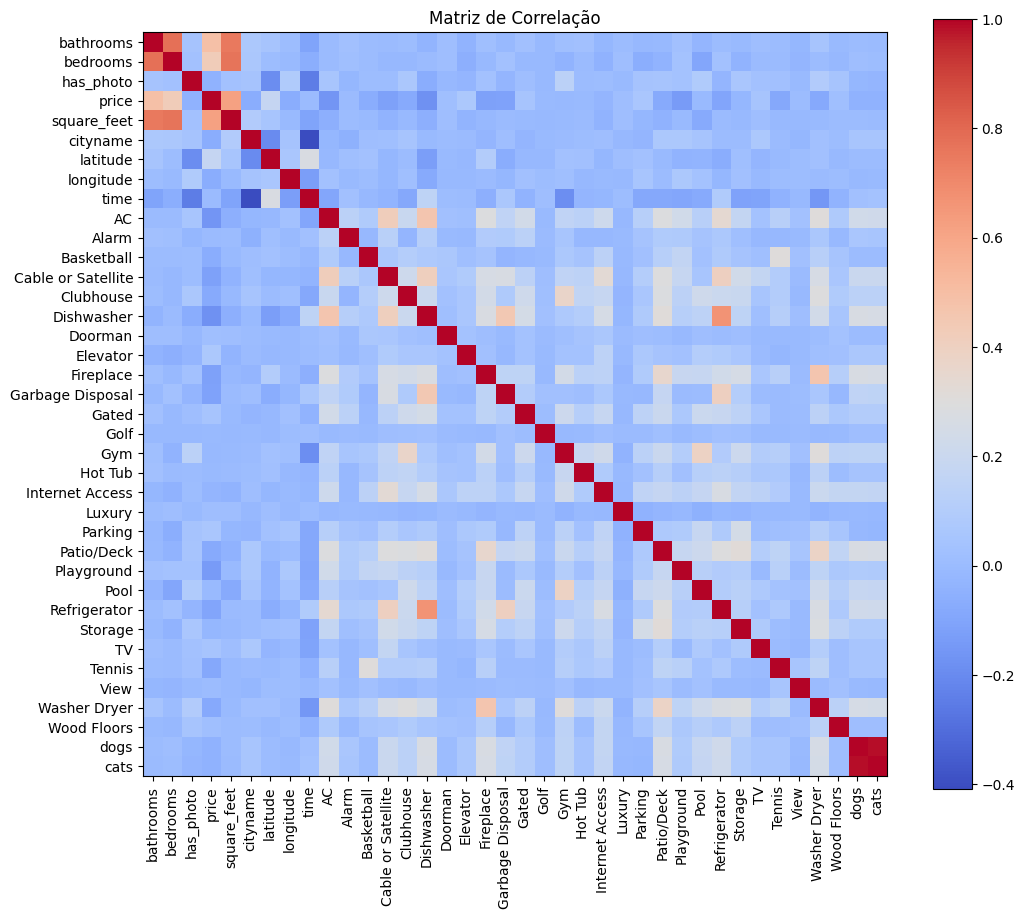

In [ ]:
# Plotar um mapa de calor para visualizar a correlação
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df_ca.columns)), df_ca.columns, rotation=90)
plt.yticks(range(len(df_ca.columns)), df_ca.columns)
plt.title('Matriz de Correlação')
plt.savefig('corr_matrix_tx.png')
plt.show()

## Construção de modelos (Regressão Linear)

### Utilizando todos os atributos

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Número de folds
k = 5

# Criar um objeto KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Listas para armazenar os resultados de cada fold
mse_scores = []
r2_scores = []

# Separar os dados em features (X) e target (y)
X = df_ca.drop('price', axis=1)  # Remove a coluna 'price' para usar como features
y = df_ca['price']

i = 0
models = {}
predXreal = {}

# Iterar pelos folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Criar e treinar o modelo de regressão linear para este fold
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Armazenar o modelo treinado para este fold
    models[f'modelo{i}'] = model

    # Fazer previsões com os dados de teste do fold
    y_pred = model.predict(X_test)

    # Avaliar o modelo para este fold
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    predXreal[f'modelo{i}'] = {'y_test': y_test, 'y_pred': y_pred}
    i += 1

    mse_scores.append(mse)
    r2_scores.append(r2)

# Imprimir os resultados médios de todos os folds
print("Mean Squared Error (Média):", np.mean(mse_scores))
print("R-squared (Média):", np.mean(r2_scores))

Mean Squared Error (Média): 86118.20042339749
R-squared (Média): 0.49743085891839806


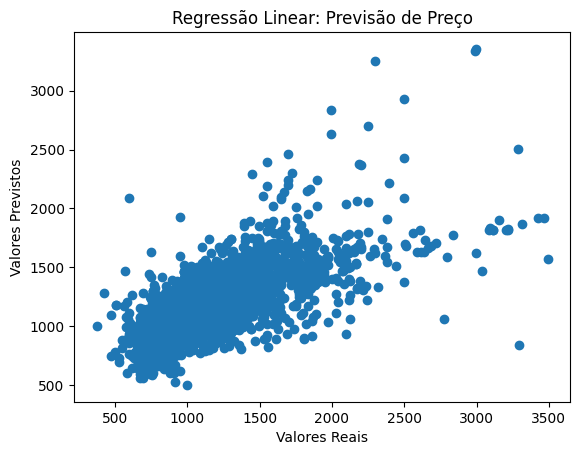

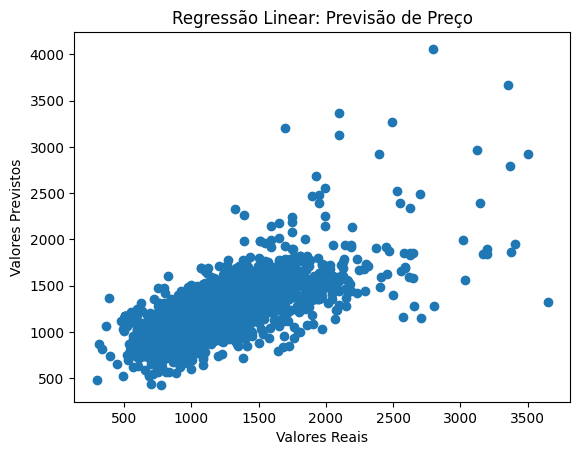

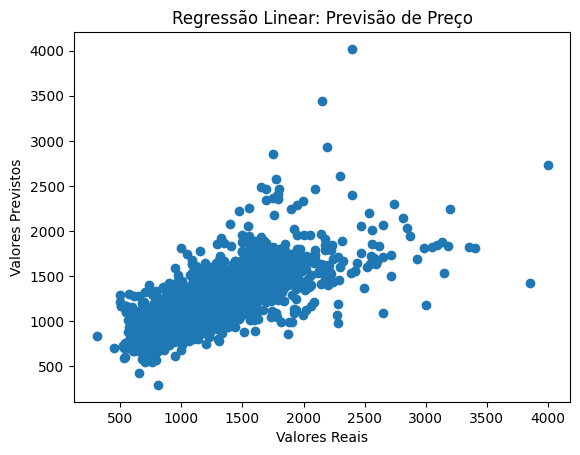

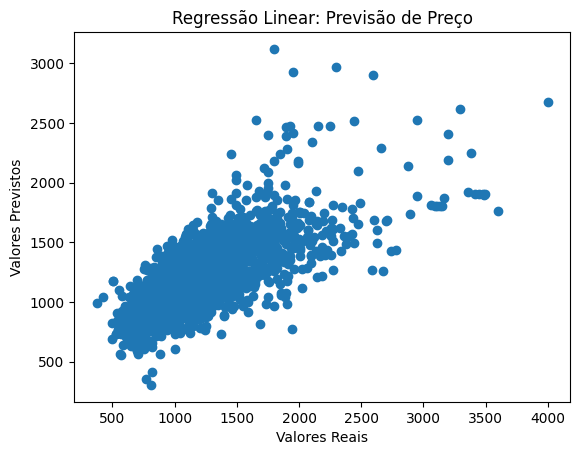

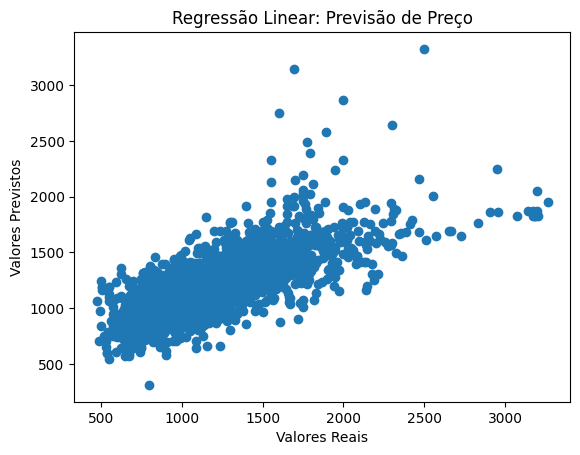

In [ ]:
for m in models:
    y_test = predXreal[m]['y_test']
    y_pred = predXreal[m]['y_pred']

    # Plotar os resultados
    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Previstos")
    plt.title("Regressão Linear: Previsão de Preço")
    plt.savefig(f'{m}_TX.png')
    plt.show()

### Utilizando SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import f_classif

# # Separar os dados em features (X) e target (y)
# X = df.drop('price', axis=1)  # Remove a coluna 'price' para usar como features
# y = df['price']

selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features = selector.get_feature_names_out()
X_selected = X[selected_features]
# print(selected_features)

In [ ]:
# Listas para armazenar os resultados de cada fold
mse_scores = []
r2_scores = []

# Separar os dados em features (X) e target (y)
# y = df['price']

i = 0
models_s = {}
predXreal_s = {}

# Iterar pelos folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Criar e treinar o modelo de regressão linear para este fold
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Armazenar o modelo treinado para este fold
    models_s[f'modelo{i}'] = model

    # Fazer previsões com os dados de teste do fold
    y_pred = model.predict(X_test)

    # Avaliar o modelo para este fold
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    predXreal_s[f'modelo{i}'] = {'y_test': y_test, 'y_pred': y_pred}
    i += 1

    mse_scores.append(mse)
    r2_scores.append(r2)


# Imprimir os resultados médios de todos os folds
print("Mean Squared Error (Média):", np.mean(mse_scores))
print("R-squared (Média):", np.mean(r2_scores))

Mean Squared Error (Média): 94606.09122166762
R-squared (Média): 0.4479493808190938


In [ ]:
# Tentando verificar F value para cada combinacao de atributos (incompleto)

import itertools

# ... (seu código existente) ...

# Lista de nomes das colunas (exceto 'price')
features = list(df_ca.columns)
features.remove('price')

# Itera por todas as combinações possíveis de features
for i in range(1, len(features) + 1):
   for combination in itertools.combinations(features, i):
      # Cria um modelo de regressão linear para cada combinação
      X_combination = df_ca[list(combination)]
      y = df_ca['price']

      model = LinearRegression()
      model.fit(X_combination, y)

      # Calcula o F-statistic do modelo atual
      y_pred = model.predict(X_combination)
      f_statistic, p_value = f_regression(X_combination, y)

      # Imprime o nome das features da combinação e o F-statistic
      print("Combinação de features:", list(combination))
      print("F-statistic:", f_statistic)
      print("----------------------------------------")


A saída de streaming foi truncada nas últimas 5000 linhas.
Combinação de features: ['time', 'Alarm', 'Gated', 'Internet Access', 'Luxury', 'Wood Floors']
F-statistic: [22.67485636  2.33942108  0.23582406  3.850173    0.         14.78002039]
----------------------------------------
Combinação de features: ['time', 'Alarm', 'Gated', 'Internet Access', 'Luxury', 'dogs']
F-statistic: [22.67485636  2.33942108  0.23582406  3.850173    0.          0.41610054]
----------------------------------------
Combinação de features: ['time', 'Alarm', 'Gated', 'Internet Access', 'Luxury', 'cats']
F-statistic: [2.26748564e+01 2.33942108e+00 2.35824060e-01 3.85017300e+00
 0.00000000e+00 3.26525686e-03]
----------------------------------------
Combinação de features: ['time', 'Alarm', 'Gated', 'Internet Access', 'Parking', 'Patio/Deck']
F-statistic: [22.67485636  2.33942108  0.23582406  3.850173   26.03968735  0.63930372]
----------------------------------------
Combinação de features: ['time', 'Alarm', 'G

KeyboardInterrupt: 

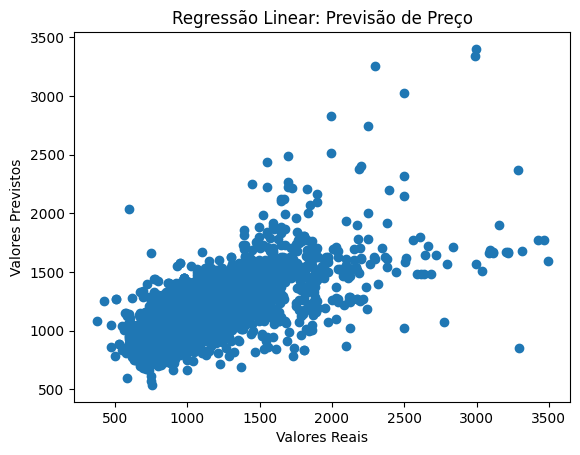

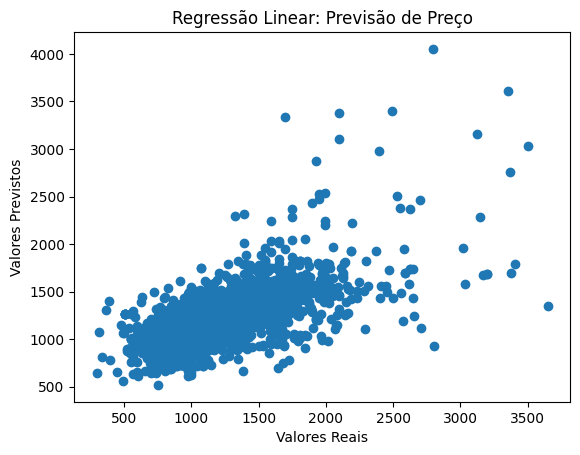

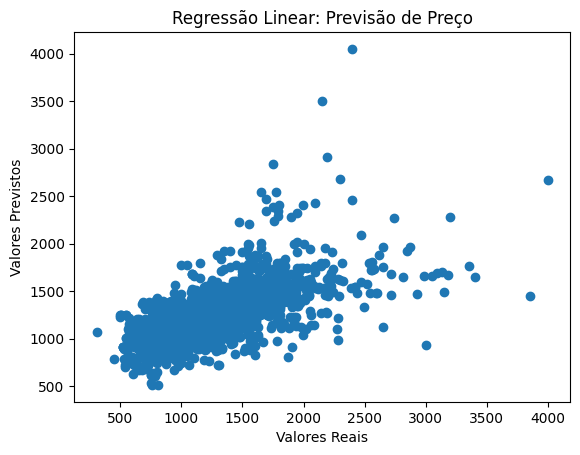

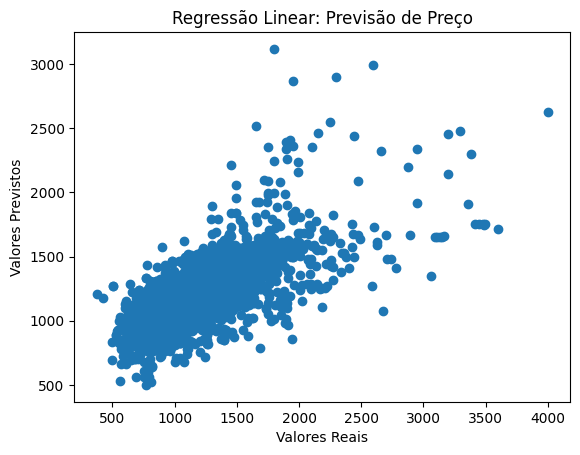

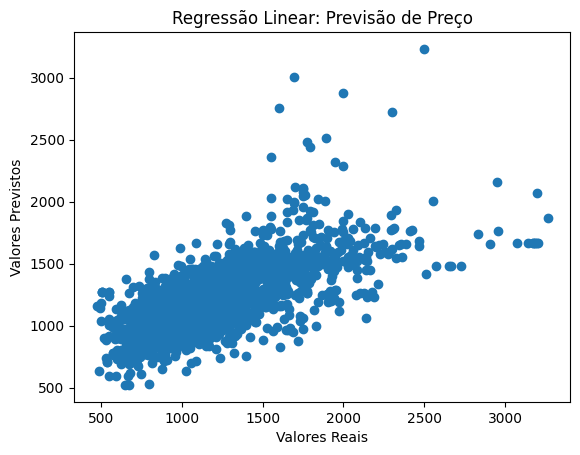

In [ ]:
for m in models_s:
    y_test = predXreal_s[m]['y_test']
    y_pred = predXreal_s[m]['y_pred']

    # Plotar os resultados (opcional)
    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Previstos")
    plt.title("Regressão Linear: Previsão de Preço")
    plt.savefig(f'{m}_TX_k_best.png')
    plt.show()